In [1]:
import numpy as np
from Trefft_tools import Assemble_blockMatrix, AssembleMatrix, TrefftzSpace
from domains import Waveguide
import matplotlib.pyplot as plt

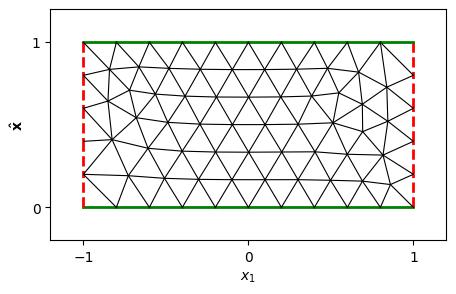

In [2]:
kappa_e = 8.
R = 1
H = 1.

Domain = Waveguide(R=R,H=H)

Domain.generate_mesh(h_max=H/5)
Domain.plot_mesh()

In [3]:
Nth = 15
V = TrefftzSpace(Domain=Domain, DOF_per_element=Nth, kappa= {"Omega_i" : kappa_e, "Omega_e" : kappa_e}, th0=0.)
N_modes = 15 #Number of modes for the DtN map


In [4]:
N_DtN = 15
G = Assemble_blockMatrix(V, Edges=Domain.Edges, H=H, k=kappa_e, N_p=Nth, a = 1/2, b = 1/2, d_1=1/2, d_2=1/2, N_DtN=N_DtN )

In [5]:
A = AssembleMatrix( V, Edges=Domain.Edges, H=H, a = 1/2, b = 1/2, d_1 = 1/2, d_2 = 1/2, k = kappa_e, Np = N_DtN)

In [6]:
A_full = A.toarray()
G_full = G.toarray()
np.max(np.abs(A_full - G_full))

np.float64(1.831026719408895e-15)

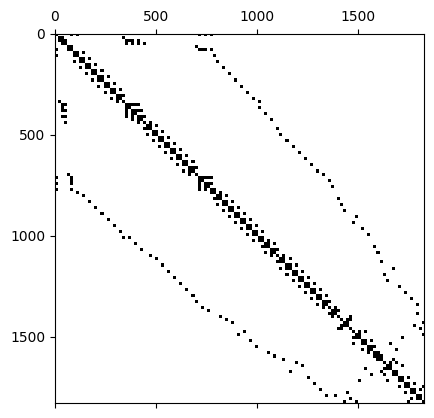

In [7]:
plt.spy(A_full)

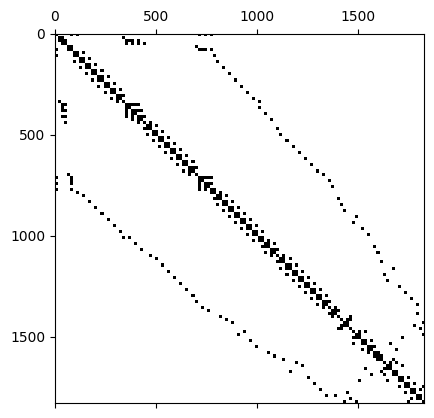

In [8]:
plt.spy(G_full)